In [1]:
# Project Context:
# 1). Handwritten Digit Recognition using Machine Learning.
# 2). Handwritten Digit Recognition is a classic machine learning problem where the goal is to correctly identify digits (0–9) written by humans. This project implements a complete end-to-end digit recognition system using the MNIST dataset and deploys it using a Flask web application.
# 3). The MNIST dataset consists of 70,000 grayscale images of handwritten digits, each image having a resolution of 28×28 pixels. Each pixel value ranges from 0 to 255, where 0 represents black and 255 represents white. These images are flattened into 784 features and used to train a machine learning model.

# Dataset Description:
# Dataset: MNIST (Modified National Institute of Standards and Technology)
# Total Samples: 70,000
# Image Size: 28 × 28 pixels
# Features per image: 784
# Classes: Digits from 0 to 9
# Pixel Value Range: 0–255 (normalized to 0–1)

# Disadvantage:
# This model works only with grayscale images.
# It cannot directly handle colored images, so any RGB image must first be converted into grayscale before prediction, which may cause loss of color-based information.

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)   # (70000, 784)
print(y.shape)   # (70000,)

(70000, 784)
(70000,)


In [3]:
X = X / 255.0          # Normalize pixel values (0–1)
y = y.astype(int)     # Convert labels to int

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

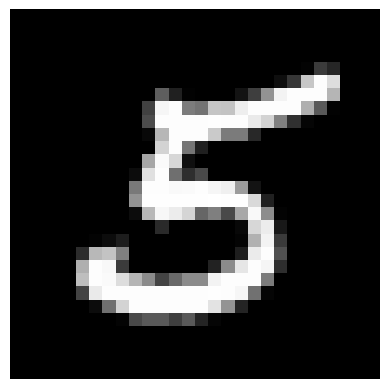

In [5]:
import matplotlib.pyplot as plt
import numpy as np

image = np.array(X_train.iloc[6]).reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

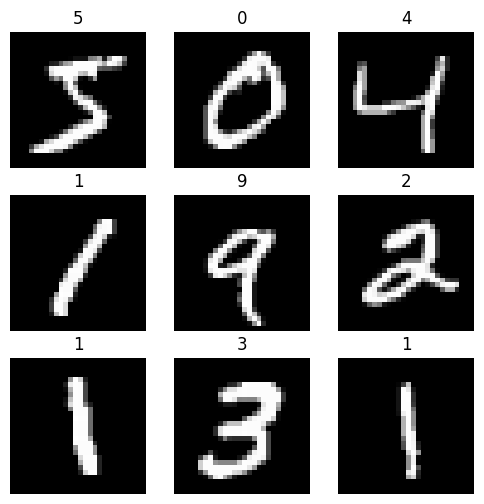

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))
for i in range(9):
    img = np.array(X.iloc[i]).reshape(28, 28)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(y.iloc[i])
    plt.axis('off')
plt.show()

In [7]:
# 7️⃣ KNN Model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(
    n_neighbors=5,      # k = 5 (default & safe)
    weights='distance'  # closer neighbors get more weight
)
model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [8]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.972


In [9]:
accuracy = model.score(X_train, y_train)
print("Training Accuracy:", accuracy)

accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.972


c:\Users\Nikku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


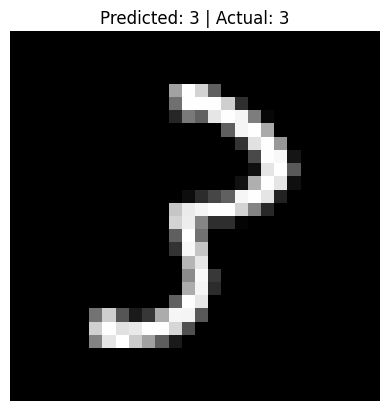

In [10]:
import matplotlib.pyplot as plt
import numpy as np

sample = X_test.iloc[10]
prediction = model.predict([sample])
plt.imshow(np.array(sample).reshape(28,28), cmap='gray')
plt.title(f"Predicted: {prediction[0]} | Actual: {y_test.iloc[10]}")
plt.axis('off')
plt.show()

In [11]:
mis_idx = np.where(y_pred != y_test)[0]
print("Total misclassified:", len(mis_idx))

Total misclassified: 392


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



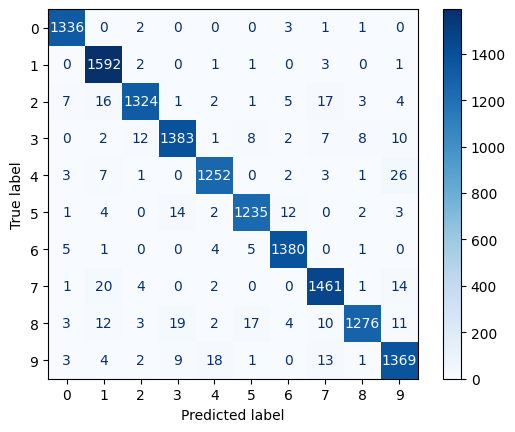

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [14]:
import pickle

# save model
with open("knn_mnist_model.pkl", "wb") as f:
    pickle.dump(model, f)